# 1- Addition to Flat file (Adding variables) 

Most of the variables have been added in the SQL section, but for adding some variables we need python. I add these variables in this section, that these variables will be available in EDA and Data cleansing.  This pre-EDA section.


In [1]:
# Import libraries:
import pyodbc
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from textblob import TextBlob, Word, Blobber

In [2]:
### Using the ODBC:
driver_name = "SQL Server Native Client 11.0"
server = "ITZIK\SQLEXPRESS"
dbname = "Berlin"

In [3]:
pd.set_option('display.max_rows', 200 , 'display.max_columns', 200)

In [4]:
### read the data:

conn = pyodbc.connect('Driver={};'
                      'Server={};'
                      'Database={};'
                      'Trusted_Connection=yes;'.format(driver_name, server, dbname))



df = pd.read_sql_query('SELECT * FROM db01.FINAL_TABLE',conn)


In [5]:
#Displaying the first 3 rows of dataframe using head() method:
df.head(3)

,listing_id,name,target_start_date_period,target_end_date_period,target_num_of_day_in_period,target_num_of_booked_days,booked_up_target,target_avg_dollar_price_in_period,start_date_previous_period,end_date_previous_period,num_of_day_in_previous_period,num_of_booked_days_in_previous_period,occupancy_last_period,avg_dollar_price_in_previous_period,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,DaysPassed_last_review,reviews_per_month,calculated_host_listings_count,availability_365,listing_url,scrape_id,last_scraped,summary,space,description,experiences_offered,notes,transit,access,interaction,house_rules,neighborhood_overview,host_about,host_since,DaysPassed_host_since,picture_url,host_url,host_location,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,smart_location,market,country_code,country,is_location_exact,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,first_review,DaysPassed_first_review,calendar_last_scraped,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,cancellation_policy,concat_comments
0,7071,BrightRoom with sunny greenview!,2019-06-01,2019-08-31,92,92,1,NaN,2018-11-07,2019-05-31,206,180,0.87,44.3846,17391.0,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42.0,2.0,197.0,2018-11-04,1042.0,1.75,1.0,26.0,https://www.airbnb.com/rooms/7071,2.018111e+13,2018-11-07,Cozy and large room in the beautiful district ...,"The BrightRoom is an approx. 20 sqm (215ft��),...",Cozy and large room in the beautiful district ...,none,I hope you enjoy your stay to the fullest! Ple...,Best access to other parts of the city via pub...,"The guests have access to the bathroom, a smal...",I am glad if I can give you advice or help as ...,Please take good care of everything during you...,"Great neighborhood with plenty of Caf��s, Bake...","I'm a creative person, adventurer, and travele...",2009-05-16,4501.0,https://a0.muscache.com/im/pictures/21278/32a1...,https://www.airbnb.com/users/show/17391,"Berlin, Berlin, Germany",within an hour,1.0,t,https://a0.muscache.com/im/pictures/user/48c3d...,https://a0.muscache.com/im/pictures/user/48c3d...,Prenzlauer Berg,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",Helmholtzplatz,Pankow,Berlin,Berlin,10437.0,"Berlin, Germany",Berlin,DE,Germany,t,Apartment,2.0,1.0,1.0,2.0,Real Bed,"{Wifi,Heating,""Family/kid friendly"",Essentials...",NaN,None,None,$0.00,$0.00,1.0,$24.00,10.0,3 days ago,15.0,26.0,26.0,2009-08-18,4407.0,2018-11-07,96.0,10.0,10.0,10.0,10.0,10.0,9.0,None,f,f,f,f,moderate,##������ ������������ ������������ �����������...
1,7071,BrightRoom with sunny greenview!,2019-07-01,2019-09-30,92,92,1,NaN,2018-11-07,2019-06-30,236,210,0.89,44.3846,17391.0,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42.0,2.0,197.0,2018-11-04,1042.0,1.75,1.0,26.0,https://www.airbnb.com/rooms/7071,2.018111e+13,2018-11-07,Cozy and large room in the beautiful district ...,"The BrightRoom is an approx. 20 sqm (215ft��),...",Cozy and large room in the beautiful district ...,none,I hope you enjoy your stay to the fullest! Ple...,Best access to other parts of the city via pub...,"The guests have access to the bathroom, a smal...",I am glad if I can give you advice or help as ...,Please take good care of everything during you...,"Great ne

In [6]:
df["listing_id"] = df["listing_id"].astype('int')
df["host_id"] = df["host_id"].astype('int')

In [7]:
# Each listing_id has 7 records in df. 
# Adding Features based on "description" and "concat_comments"

# selecting colums that desribe the property/listening (this is equvalenet to agg first)
df_unique_listings = df[['listing_id',  'description', 'concat_comments']]

# Drop Duplicates
df_unique_listings = df_unique_listings.drop_duplicates('listing_id')

print("df num of records:", len(df))
print("df_unique_listings num of records: ", len(df_unique_listings), "Each listing_id appears:", len(df)/len(df_unique_listings))
df_unique_listings.head(3)

df num of records: 157864
df_unique_listings num of records:  22552 Each listing_id appears: 7.0


,listing_id,description,concat_comments
0,7071,Cozy and large room in the beautiful district ...,##������ ������������ ������������ �����������...
7,9991,4 bedroom with very large windows and outstand...,##Nous avons pass�� une agr��able semaine avec...
14,17904,- beautiful studio apt in downtown Berlin - br...,"##&#x0D;\nMax's studio is a very nice, clean a..."


In [8]:
df_unique_listings = df_unique_listings.reset_index(drop=True)


### Extracting size from description column

In [9]:
# extracting numbers that present the size from the description column
df_unique_listings['size'] = df_unique_listings['description'].str.extract('(\d{2,3}\s?[smSM])', expand=True)
df_unique_listings['size'] = df_unique_listings['size'].str.replace("\D", "")

# change datatype of size into float
df_unique_listings['size'] = df_unique_listings['size'].astype(float)


C:\Users\itzikjan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
df_unique_listings[['description', 'size']].head(10)

,description,size
0,Cozy and large room in the beautiful district ...,20.0
1,4 bedroom with very large windows and outstand...,780.0
2,- beautiful studio apt in downtown Berlin - br...,16.0
3,Very nice furnished 2 bedroom apartment for su...,NaN
4,"Attention, before you send me a booking reques...",75.0
5,"nice room to rent, not longer then 2 weeks or ...",NaN
6,Dear Guests - Welcome to Berlin! very nice and...,75.0
7,Looking for a new tenant starting at the end o...,21.0
8,We enjoy having guests at our place who apprec...,310.0
9,"One room in a spacious, sunny luxury two-room ...",NaN


In [11]:
print("number of na(s):", df_unique_listings[['size']].isna().sum()[0], "( Out of", len(df_unique_listings), ")")

number of na(s): 11797 ( Out of 22552 )


## Retrieving the sentiment of "concat_comments"

In this section, we will analyze the sentiment of visitors' comments in order to understand their level of satisfaction with the property.

For analyzing sentiments linguistic experts have build a dictionary of the most common used words in each language and have given each word a value determining the degree of positiveness, negativeness of neutrality of each word. The total sentiment of a text is calculated by averaging the sentiment of all the words that compose the text. This measure is expressed as the <i>Polarity</i> of the text and can range from -1 for highly negative sentiment to +1 for highly positive sentiment. 
 
Additionally, some words are known to expose the subjectivity of a statement. For example the word <i> think </i> is highly subjective and points to a personal opinion while the word <i> know </i> is pointing to some kind of information and has lower subjectivity. The subjectivity measure ranges from 0 to 1.




In [12]:
# printing the first concat comments:
print(df.loc[0,'concat_comments'])


##������ ������������ ������������ ������������###������ ������������ ��������� ���������������. ��������� ������������������ ��������� ��������� ������������ ������������������!###���������������� ����������, �������������� ��������������, ���������� ��������������. �������������� ������������������������, ����������, �������������� - ������ ����������. ������ �������������� ���������� ���������� ���� ������������ ������������ - ����������������.###���������������������������,���������������,������������������������������,������������������������,���������������������������������,������S1���tram���������###1A Lage &amp; Location, Can ist super nett; ich kann es wirklich nur weiterempfehlen.###A lovely room with the vibe of Berlin all around.
###a wonderful, comfortable and spacious room with a great view of a leafy courtyard. can and his family are considerate and obliging hosts -- i had a great stay and would certainly return.###A wounderful big room, cosy, bright, calm ... in the mi

### Calculating the sentiment of each property overview 

In [13]:
# Sentiment Analysis
# adding polarity and subjectivity to dataframe base on "concat_comments"


def get_polarity_subjectivity(text: str) -> list:
    """
    Processing textual data with TextBlob for getting polarity, subjectivity base on a text.
    (This method can be used with pandas apply )
    if text is null or number - the polarity and subjectivity are neutral [0,0]
    """
    if text is None or text == "" or type(text) is not str :
        return [None, None]
    text_blob_obj = TextBlob(str(text))
    polarity = text_blob_obj.sentiment[0]
    subjectivity = text_blob_obj.sentiment[1]
    return [polarity, subjectivity]


def add_polarity_subjectivity_columns(df_src: pd.DataFrame, src_col_name: str, polarity_target_col_name: str = 'polarity' , subjectivity_target_col_name: str = 'subjectivity') -> pd.DataFrame:
    """
    Base on text column adding polarity and subjectivity columns to dataframe.
    """
    df_src['sentiment_array_temp'] = df_src[src_col_name].apply(get_polarity_subjectivity)
    df_src[[polarity_target_col_name,subjectivity_target_col_name]] = pd.DataFrame(df_unique_listings['sentiment_array_temp'].tolist(), index= df_unique_listings.index)
    df_src.drop(['sentiment_array_temp'], axis=1, inplace=True)
    return df_src

In [14]:
df.loc[0,'concat_comments']

'##������ ������������ ������������ ������������###������ ������������ ��������� ���������������. ��������� ������������������ ��������� ��������� ������������ ������������������!###���������������� ����������, �������������� ��������������, ���������� ��������������. �������������� ������������������������, ����������, �������������� - ������ ����������. ������ �������������� ���������� ���������� ���� ������������ ������������ - ����������������.###���������������������������,���������������,������������������������������,������������������������,���������������������������������,������S1���tram���������###1A Lage &amp; Location, Can ist super nett; ich kann es wirklich nur weiterempfehlen.###A lovely room with the vibe of Berlin all around.\n###a wonderful, comfortable and spacious room with a great view of a leafy courtyard. can and his family are considerate and obliging hosts -- i had a great stay and would certainly return.###A wounderful big room, cosy, bright, calm ... in the 

In [15]:
# Testing get_polarity_subjectivity
#1. legimiate Value
polarity_subjectivity_list = get_polarity_subjectivity(df.loc[0,'concat_comments'])
assert -1 <= polarity_subjectivity_list[0] and polarity_subjectivity_list[0] <= 1
assert -1 <= polarity_subjectivity_list[1] and polarity_subjectivity_list[1] <= 1
print("polarity_subjectivity_list in case of string:", polarity_subjectivity_list)


#2. float number (this method expect string)
polarity_subjectivity_list = get_polarity_subjectivity(0.999)
assert polarity_subjectivity_list[0] == None
assert polarity_subjectivity_list[1] == None

print("polarity_subjectivity_list in case of 0.999:", polarity_subjectivity_list)

#3. None and empty string
polarity_subjectivity_list = get_polarity_subjectivity(None)
assert polarity_subjectivity_list[0] == None
assert polarity_subjectivity_list[1] == None
print("polarity_subjectivity_list in case of None:", polarity_subjectivity_list)

polarity_subjectivity_list = get_polarity_subjectivity("")
assert polarity_subjectivity_list[0] == None
assert polarity_subjectivity_list[1] == None
print("polarity_subjectivity_list in case of empty string:", polarity_subjectivity_list)


polarity_subjectivity_list in case of string: [0.3870320074376784, 0.6067832695552277]
polarity_subjectivity_list in case of 0.999: [None, None]
polarity_subjectivity_list in case of None: [None, None]
polarity_subjectivity_list in case of empty string: [None, None]


In [16]:
df_unique_listings = add_polarity_subjectivity_columns(df_src=df_unique_listings, 
                                  src_col_name="concat_comments", 
                                  polarity_target_col_name="concat_comments_polarity",
                                  subjectivity_target_col_name="concat_comments_subjectivity")

In [17]:
df_unique_listings

,listing_id,description,concat_comments,size,concat_comments_polarity,concat_comments_subjectivity
0,7071,Cozy and large room in the beautiful district ...,##������ ������������ ������������ �����������...,20.0,0.387032,0.606783
1,9991,4 bedroom with very large windows and outstand...,##Nous avons pass�� une agr��able semaine avec...,780.0,0.457673,0.665630
2,17904,- beautiful studio apt in downtown Berlin - br...,"##&#x0D;\nMax's studio is a very nice, clean a...",16.0,0.374371,0.610400
3,22415,Very nice furnished 2 bedroom apartment for su...,"##�������� ���� ���������� Berlinale, �� �����...",NaN,0.380966,0.602053
4,28268,"Attention, before you send me a booking reques...",##A great apartment minutes from the centre of...,75.0,0.354972,0.601840
...,...,...,...,...,...,...
22547,19547169,The flat contains an interesting mix of modern...,##Amazing apartment with perfect location woul...,40.0,0.443826,0.635079
22548,19548473,Our calm and very bright flat is directly in t...,##Lino was a wonderful host! Convenient locati...,15.0,0.381891,0.647731
22549,17454646,All rooms of the flat can be used as your own.,##In der Unterkuft von Katya bleiben keine Wue...,NaN,0.099679,0.466667
22550,17459139,My cozy flat has a total of 44 square meter. I...,##Cosy place to stay! We had a little problem ...,44.0,0.345295,0.609854


In [18]:
#Adding sentiment column base on polarity column
# Getting positive, negative or netural sentiment base on thresholds.

def get_sentiment(polarity: float, negative_threshold: float = -0.05, positive_threshold: float = 0.05) -> int:
    """
    polarity expected valuesim range of [-1,1] or None
    """
    if polarity < negative_threshold:
        return "negative_sentiment"
    elif polarity > positive_threshold:
        return "positive_sentiment"
    elif polarity >= -1 and polarity <= 1:
        return "neutral_sentiment"
    elif pd.isna(polarity): # is None
        return None
    else:
        raise Exception("Unexpected polarity: " + str(polarity))

df_unique_listings["concat_comments_sentiment"] = df_unique_listings["concat_comments_polarity"].apply(get_sentiment)
df_unique_listings["concat_comments_sentiment"] = df_unique_listings["concat_comments_sentiment"].astype('category')

In [19]:
df_unique_listings.head()

,listing_id,description,concat_comments,size,concat_comments_polarity,concat_comments_subjectivity,concat_comments_sentiment
0,7071,Cozy and large room in the beautiful district ...,##������ ������������ ������������ �����������...,20.0,0.387032,0.606783,positive_sentiment
1,9991,4 bedroom with very large windows and outstand...,##Nous avons pass�� une agr��able semaine avec...,780.0,0.457673,0.665630,positive_sentiment
2,17904,- beautiful studio apt in downtown Berlin - br...,"##&#x0D;\nMax's studio is a very nice, clean a...",16.0,0.374371,0.610400,positive_sentiment
3,22415,Very nice furnished 2 bedroom apartment for su...,"##�������� ���� ���������� Berlinale, �� �����...",NaN,0.380966,0.602053,positive_sentiment
4,28268,"Attention, before you send me a booking reques...",##A great apartment minutes from the centre of...,75.0,0.354972,0.601840,positive_sentiment


In [20]:
print("num of nas", df_unique_listings['concat_comments_sentiment'].isna().sum())
df_unique_listings.groupby(by=['concat_comments_sentiment'],dropna=False).count()['concat_comments_polarity']

num of nas 10387


concat_comments_sentiment
negative_sentiment       31
neutral_sentiment       560
positive_sentiment    11574
Name: concat_comments_polarity, dtype: int64

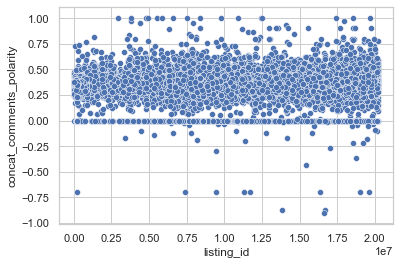

In [21]:
#Let's see in the graph the polarity variable distribution
sns.set_theme(style="whitegrid")
sns.scatterplot(data=df_unique_listings, x='listing_id', y='concat_comments_polarity')

In [22]:
# enrich flat table with columns 'size','concat_comments_polarity', 'concat_comments_subjectivity','concat_comments_sentiment'
df = df.merge(df_unique_listings[['listing_id', 'size','concat_comments_polarity', 'concat_comments_subjectivity','concat_comments_sentiment']],  how='inner', on='listing_id')

In [23]:
df.head()

,listing_id,name,target_start_date_period,target_end_date_period,target_num_of_day_in_period,target_num_of_booked_days,booked_up_target,target_avg_dollar_price_in_period,start_date_previous_period,end_date_previous_period,num_of_day_in_previous_period,num_of_booked_days_in_previous_period,occupancy_last_period,avg_dollar_price_in_previous_period,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,DaysPassed_last_review,reviews_per_month,calculated_host_listings_count,availability_365,listing_url,scrape_id,last_scraped,summary,space,description,experiences_offered,notes,transit,access,interaction,house_rules,neighborhood_overview,host_about,host_since,DaysPassed_host_since,picture_url,host_url,host_location,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,smart_location,market,country_code,country,is_location_exact,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,first_review,DaysPassed_first_review,calendar_last_scraped,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,cancellation_policy,concat_comments,size,concat_comments_polarity,concat_comments_subjectivity,concat_comments_sentiment
0,7071,BrightRoom with sunny greenview!,2019-06-01,2019-08-31,92,92,1,NaN,2018-11-07,2019-05-31,206,180,0.87,44.3846,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42.0,2.0,197.0,2018-11-04,1042.0,1.75,1.0,26.0,https://www.airbnb.com/rooms/7071,2.018111e+13,2018-11-07,Cozy and large room in the beautiful district ...,"The BrightRoom is an approx. 20 sqm (215ft��),...",Cozy and large room in the beautiful district ...,none,I hope you enjoy your stay to the fullest! Ple...,Best access to other parts of the city via pub...,"The guests have access to the bathroom, a smal...",I am glad if I can give you advice or help as ...,Please take good care of everything during you...,"Great neighborhood with plenty of Caf��s, Bake...","I'm a creative person, adventurer, and travele...",2009-05-16,4501.0,https://a0.muscache.com/im/pictures/21278/32a1...,https://www.airbnb.com/users/show/17391,"Berlin, Berlin, Germany",within an hour,1.0,t,https://a0.muscache.com/im/pictures/user/48c3d...,https://a0.muscache.com/im/pictures/user/48c3d...,Prenzlauer Berg,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",Helmholtzplatz,Pankow,Berlin,Berlin,10437.0,"Berlin, Germany",Berlin,DE,Germany,t,Apartment,2.0,1.0,1.0,2.0,Real Bed,"{Wifi,Heating,""Family/kid friendly"",Essentials...",NaN,None,None,$0.00,$0.00,1.0,$24.00,10.0,3 days ago,15.0,26.0,26.0,2009-08-18,4407.0,2018-11-07,96.0,10.0,10.0,10.0,10.0,10.0,9.0,None,f,f,f,f,moderate,##������ ������������ ������������ �����������...,20.0,0.387032,0.606783,positive_sentiment
1,7071,BrightRoom with sunny greenview!,2019-07-01,2019-09-30,92,92,1,NaN,2018-11-07,2019-06-30,236,210,0.89,44.3846,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42.0,2.0,197.0,2018-11-04,1042.0,1.75,1.0,26.0,https://www.airbnb.com/rooms/7071,2.018111e+13,2018-11-07,Cozy and large room in the beautiful district ...,"The BrightRoom is an approx. 20 sqm (215ft��),...",Cozy and large room in the beautiful district ...,none,I hope you enjoy your stay to the fullest! Ple...,Best access to other parts of the city via pub...,"The guests have access to the bathroo

In [24]:
df.to_csv("flat_file.csv")